# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [3]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

/Applications/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Step 2: Read in your data set 

In [4]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [5]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

400

#### Question 2. Create a summary table

In [6]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: both variables are more or less trying to gauge the same thing (student skills) but on a different scale. Assuming that both variables are indeed refelctive of the student's skills level and knowing that the scale of GRE is larger and wider spread, you would expect that the actual scores are larger and wider spread as well.

#### Question 4. Drop data points with missing data


In [14]:
df_raw2 = df_raw[(df_raw.gre>0) & (df_raw.gpa>0) & (df_raw.prestige>0)]

print pd.isnull(df_raw).sum()
print pd.isnull(df_raw2).sum()


print df_raw[df_raw.prestige.isnull() | df_raw.gre.isnull() | df_raw.gpa.isnull()]
# the above command shows rows where prestige has no value OR gre has no value OR gpa has no value

print df_raw2.describe()

# see numpy and panda lesson and example code



admit       0
gre         2
gpa         2
prestige    1
dtype: int64
admit       0
gre         0
gpa         0
prestige    0
dtype: int64
     admit    gre   gpa  prestige
187      0    NaN   NaN       2.0
212      0    NaN  2.87       2.0
236      1  660.0   NaN       NaN
            admit         gre         gpa    prestige
count  397.000000  397.000000  397.000000  397.000000
mean     0.317380  587.858942    3.392242    2.488665
std      0.466044  115.717787    0.380208    0.947083
min      0.000000  220.000000    2.260000    1.000000
25%      0.000000  520.000000    3.130000    2.000000
50%      0.000000  580.000000    3.400000    2.000000
75%      1.000000  660.000000    3.670000    3.000000
max      1.000000  800.000000    4.000000    4.000000


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Print the rows that are part of df_raw and not part of df_raw2 OR count null values in df_raw and in df_raw2 as done above

#### Question 6. Create box plots for GRE and GPA

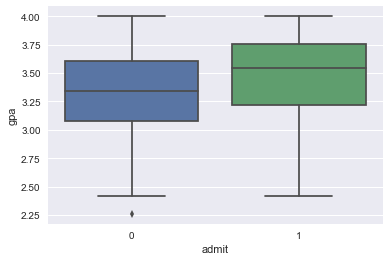

In [29]:
sns.boxplot(x="admit", y="gpa", data=df_raw2)

# You can also pick a variable for both X and Y axis
# sns.boxplot(x="admit", y="gpa", data=df_raw2)

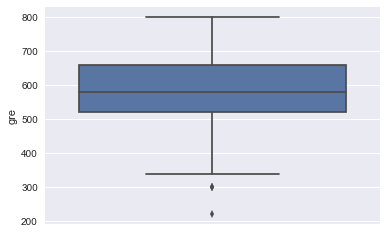

In [27]:
sns.boxplot(y="gre", data=df_raw2)

#### Question 7. What do this plots show?

Answer: The box plots for GPA shows: 
- first line from bottom: 0% students scored below this score
- between first and second line: 25% of students scored between these scores
- between first and second line: 50%
- between first and third line: 75%
- between first and fourth line: 100%
All of the above EXCLUDES outlier students. Outlier students are defined as students who score is more than 1.5 time the interquartile range away 

#### Question 8. Describe each distribution 

Axes(0.125,0.125;0.775x0.755)


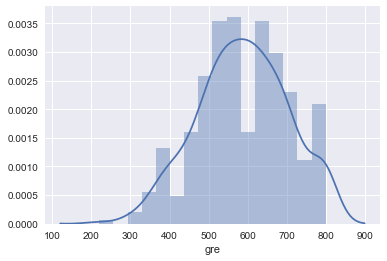

In [43]:
# plot the distribution of each variable 
# I am using seaborn library

sns.distplot(df_raw2[("gre")])



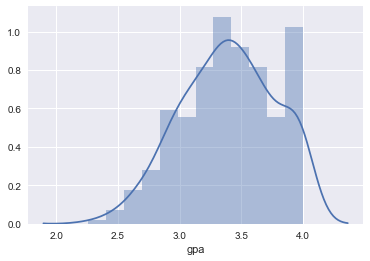

In [44]:
# plot the distribution of each variable 
# I am using seaborn library

sns.distplot(df_raw2[("gpa")])

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: The assumption of normal distribution is only met for a limited extent. The histogram shows that the distribution is not symetrical enough to be considered normal.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes, correction would be advisable however I am not sure what transformation would be the best. We have only spoken about log transformation but I am not sure how / why this would help. 

#### Question 11. Which of our variables are potentially colinear? 

In [15]:
# create a correlation matrix for the data

print np.corrcoef(df_raw2[("gpa")],df_raw2[("gre")])
print np.corrcoef(df_raw2[("gpa")],df_raw2[("prestige")])
print np.corrcoef(df_raw2[("gre")],df_raw2[("prestige")])

print
print df_raw2.corr()

# Use panda function, not numpy function. Command above is panda while first three is numpy. 
# In the above three commands numpy "happens to work" because it is simply relating two varaibles 
# and not more than two variables

[[ 1.          0.38240821]
 [ 0.38240821  1.        ]]
[[ 1.         -0.06097617]
 [-0.06097617  1.        ]]
[[ 1.         -0.12453252]
 [-0.12453252  1.        ]]

             admit       gre       gpa  prestige
admit     1.000000  0.181202  0.174116 -0.243563
gre       0.181202  1.000000  0.382408 -0.124533
gpa       0.174116  0.382408  1.000000 -0.060976
prestige -0.243563 -0.124533 -0.060976  1.000000


#### Question 12. What did you find?

Answer: GPA and GRE are correlated (0.38) but not as strongly as one would expect. Prestige is very weakly correlated to either GPA or GRE

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer:  Based on the available data we will parse, mine, refine the data, build a datamodel and present the results. In practice this will mean we will clearly describe and evaluate the quality of the GRE, GPA, prestige and admission data. We will remove students from the set where one or more data elements are missing and we will remove outliers (most likely due to issues with the data). Next we will continue our exploratory data analysis by evaluating and reviewing the nature of data distribution through plot graphs and historgrams. If necessary we will transform some of the data attributes to better approximate the normal distribution. We will finally build a model that will predict if a student will be admitted or not based on his / her GPA, GRE and school prestige. (NOTE: the alternative will be to build a model that predicts the chance that a student will be admitted or not based on his / her GPA, GRE and school prestige. The problem with this second model is that I do not know how to define the nul hypothesis in this case).

#### Question 14. What is your hypothesis? 

Answer: The nul hypothesis is that the model's prediction is incorrect. The alternative hypothesis is that the prediction is correct. The predicition is whether or not a student is admitted.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data